In [1]:
# Import os and redirect to my dataset
import os

os.chdir('C:\\Users\\Ivan Tay\\SP Year 1 Sem 2\\PDAS\\PDASCA2_1B03-2335133-IVANTAYYUENHENG\\Datasets')

# OBJECTIVE


## How does number of graduates in Singapore contribute towards employment rates and job vacancies?

We are conducting a research whether education in their country does contribute to employment rates and job vacancies. Firstly, we want to see the number of graudates in different insitution in Singapore over the years and whether it does it help give more employment opportunity or help increase job vacancies for more business opportunities.

First import the necessary modules and datasets needed for data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Education

# Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD
# https://beta.data.gov.sg/datasets/d_3c55210de27fcccda2ed0c63fdd2b352/view
grad = pd.read_csv('GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv')


# Graduates by institutions

# https://beta.data.gov.sg/datasets/d_06067a3d18f8a5779acfbf19c62cb656/view
inst = pd.read_csv('Graduatesbyinstitutions.csv')

# Employment Rate of Residents Aged 25 to 64 (Total)
# https://beta.data.gov.sg/datasets/d_f50492fe89a0c3a522bf9c04ce3e6380/view
emp = pd.read_csv('EmploymentRateofResidentsAged25to64Total.csv')

# Job vacancies

# Job Vacancy - Topline
# https://beta.data.gov.sg/datasets/d_69d444ac676644d33bf4010de19c95a5/view
job_num = pd.read_csv('JobVacancyTopline.csv')

# Job Vacancy Rate - Topline
# https://beta.data.gov.sg/datasets/d_cbe1d2c4e90562e78ec821f39e05e94a/view
job_rate = pd.read_csv('JobVacancyRateTopline.csv')

# 1) Data Analysis

Let's first analysis the datasets by using a function.

In [3]:
# Put all datasets into an array so it can be loop later. This allow us to extract dataset information for each and every dataset
# This allow more efficient code management and can be reused constantly afterwards.
 
def datasets(name, df):
    
    # Show the date
    date = 'years'
    
    # Show rows and columns the dataset have
    print(f"{name} datasets have {df.shape[0]} rows and {df.shape[1]} columns")

    print(f"\n{name} datasets columns contain:")


    for column in df.columns:
        
        # Show the datatypes and how many unique value it contains
        print('\n\t- ' + column + f"\n\t\t- Datatype of {column} is: {df.dtypes[column]}  \n\t\t- Number of null values counts: {df[column].isnull().sum()}")
        print(f'\t\t- {column} has {len(df[column].unique())} unique values')

        # If it is a numerical value. Show the sum, min, max, mean and median
        if column != 'year' and (df.dtypes[column] == 'int64' or df.dtypes[column] == 'float64'):
            
            # Check if its year or quarter
            if column == 'job_vacancy_rate':
                date = 'quarters'
                
            print(f'\t\t- {column} sum from all {date}: {df[column].sum():.2f} \n\t\t- {column} minimum value from all {date}: {df[column].min():.2f} \n\t\t- {column} maximum value from all {date}: {df[column].max():.2f}')
            print(f'\t\t- {column} mean from all {date}: {df[column].mean():.2f} \n\t\t- {column} median from all {date}: {df[column].median():.2f}')


# 2) Graduate Employment Survey

We will first examine the graduation employment survey. Our first objective is to see which university offers the highest overall employment rate and full-time permanent employment rate. 

Collect the graduation employment survey dataset.

In [4]:
# Get the graduation dataset
grad.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [5]:
# There is missing value (na). However, it is not considered as null value. 
# We want to convert the missing value into null value.
# This allow us to be able to use isnull to find missing value
# Use np.NaN
grad = grad.replace('na', np.NaN)

# Not only that. Since, employment_rate_overall, employment_rate_ft_perm, basic_monthly_mean, basic_monthly_median,
# gross_monthly_mean, gross_monthly_median, gross_mthly_25_percentile, gross_mthly_75_percentile datatype is an object
# change it to numeric.

# Change to numeric using for loop
objToNum = grad.iloc[:, 4:]

for i in objToNum:
    grad[i] = pd.to_numeric(grad[i])

In [6]:
# Extract the dataset for graduation employment survey
datasets('Graduate Employment Survey', grad)

Graduate Employment Survey datasets have 1121 rows and 12 columns

Graduate Employment Survey datasets columns contain:

	- year
		- Datatype of year is: int64  
		- Number of null values counts: 0
		- year has 9 unique values

	- university
		- Datatype of university is: object  
		- Number of null values counts: 0
		- university has 6 unique values

	- school
		- Datatype of school is: object  
		- Number of null values counts: 28
		- school has 68 unique values

	- degree
		- Datatype of degree is: object  
		- Number of null values counts: 0
		- degree has 337 unique values

	- employment_rate_overall
		- Datatype of employment_rate_overall is: float64  
		- Number of null values counts: 89
		- employment_rate_overall has 226 unique values
		- employment_rate_overall sum from all years: 94549.00 
		- employment_rate_overall minimum value from all years: 66.70 
		- employment_rate_overall maximum value from all years: 100.00
		- employment_rate_overall mean from all years: 91.62 
		

Graduate Employment Survey dataset have twelve columns consist of year, university, school, degree, employment_rate_overall, employment_rate_ft_perm, basic_monthly_mean, basic_monthly_median, gross_monthly_mean, gross_monthly_median, gross_mthly_25_percentile and gross_mthly_75_percentile. 

university columns have 6 unique value and 0 null value.

schools columns have 68 unique value and 28 null value.

degree columns have 337 unique values and 0 null value.

The remaining columns have a total of 89 null values each.

Most important columns that we need to get:
(employment_rate_overall and employment_rate_ft_perm)

employment_rate_overall have a sum rate of 94549%. The least  employment_rate_overall rate is 66.70%. The most employment_rate_overall rate is 100.0% rate. employment_rate_overall have a higher median rate than its mean rate since it has a mean of 91.62% and median of 92.70%. It has 226 unique values.

employment_rate_ft_perm have a sum rate of 83997.90%. The least  employment_rate_overall rate is 14.30%. The most employment_rate_overall rate is 100.0% rate. employment_rate_overall have a higher mean rate than its median rate since it has a mean of 81.39% and median of 84.70%. It has 393 unique values.



In [7]:
# We only want to find graduation affecting employment_rate_overall and employment_rate_ft_perm
# We subset the only important dataset we needed (university, employment_rate_overall, employment_rate_ft_perm)

grad = grad[['university', 'employment_rate_overall', 'employment_rate_ft_perm']]

In [8]:
# First, we want to check which columns in the graduation employment dataset have the most null value.

print('The number of missing value a column have:\n')

for column in grad.columns:
    print(column + ':', grad[column].isnull().sum())
    
print('\nGraduate by graduation employment datasets current shape:', grad.shape)

The number of missing value a column have:

university: 0
employment_rate_overall: 89
employment_rate_ft_perm: 89

Graduate by graduation employment datasets current shape: (1121, 3)


In [9]:
# Since there is null value. We clean it by dropping missing value.
grad = grad.dropna()

print('\nGraduate by graduation employment datasets current shape after removing missing value:', grad.shape)


Graduate by graduation employment datasets current shape after removing missing value: (1032, 3)


In [10]:
# Find the mean for overall employment rate for each institution and mean for full-time permanent employment rate for each
# institution
mean_employment = grad.groupby('university')[['employment_rate_overall', 'employment_rate_ft_perm']].mean()

mean_employment

,employment_rate_overall,employment_rate_ft_perm
university,,
Nanyang Technological University,89.392835,78.137695
National University of Singapore,91.925312,82.150312
Singapore Institute of Technology,92.514407,81.246610
Singapore Management University,94.723148,89.230556
Singapore University of Social Sciences,93.090909,74.045455
Singapore University of Technology and Design,93.052000,87.500000


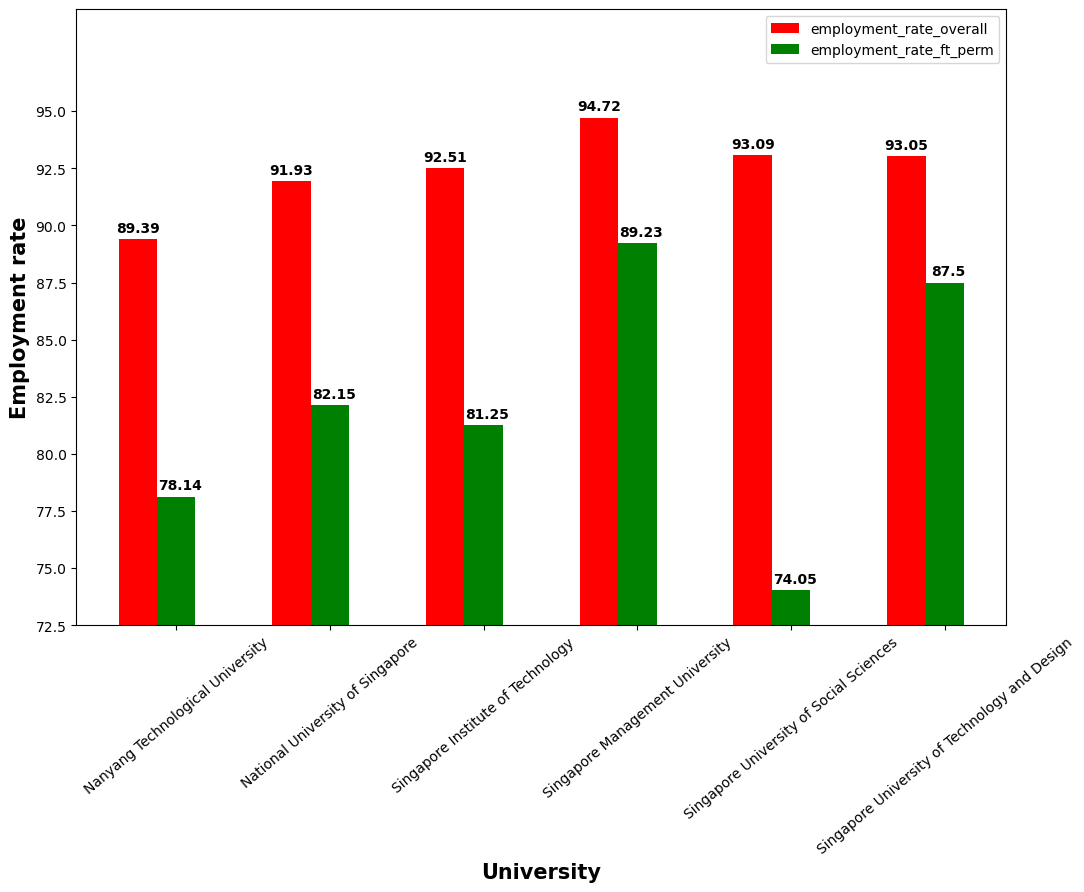

In [11]:
# Plot a bar graph
fig , ax= plt.subplots(figsize =(12, 8)) 
 

# Set position of bar on X axis 
br1 = np.arange(len(mean_employment.index))
br2 = [x + 0.25 for x in br1] 
 
# Plot the bar
ax.bar(br1, mean_employment['employment_rate_overall'], color ='r', width = 0.25, 
     label ='employment_rate_overall') 
ax.bar(br2, mean_employment['employment_rate_ft_perm'], color ='g', width = 0.25,
        label ='employment_rate_ft_perm') 


employment_mean_rate = mean_employment['employment_rate_overall']

# Total employment_mean_rate labels
for i, total_emp_mean_rate in enumerate(employment_mean_rate):
  ax.text(i, total_emp_mean_rate + 0.3, round(total_emp_mean_rate, 2),
          ha = 'center', weight = 'bold', color = 'black')


employment_mean_rate_ft_perm = mean_employment['employment_rate_ft_perm']

# Total employment_mean_rate_ft_perm labels
for i, total_emp_mean_rate_ft_perm in enumerate(employment_mean_rate_ft_perm):
  ax.text(i + 0.275, total_emp_mean_rate_ft_perm + 0.3, round(total_emp_mean_rate_ft_perm, 2),
          ha = 'center', weight = 'bold', color = 'black')


# Adding labels 
plt.xlabel('University', fontweight ='bold', fontsize = 15) 
plt.ylabel('Employment rate', fontweight ='bold', fontsize = 15) 
plt.yticks(np.arange(72.5, 96, 2.5))
plt.xticks([r + 0.25 for r in range(len(mean_employment.index))], 
        mean_employment.index, rotation = 40)

# Make sure the y-axis minimum value is 70
plt.ylim(bottom=72.5)

# Show legend
plt.legend()
plt.show() 

From the bar graph, we can see that Singapore Institute of Technology have the highest overall mean employment rate of 94.72% and the highest mean full time permanent employment rate of 89.23%. Even though Singapore University of Social Sciences have the second highest mean overall employment rate of 93.09%, it apparantly has the lowest mean full time permanent employment rate of only 74.05%. Lastly, Nanyang Technological University have the lowest overall mean employment rate of only 89.39%.

Overall, graduating from institution in Singapore does allow a higher rate of employment entry (>70%). However, how does it affect employment rate in general?

## Now, we want to see whether number of graduates does affect employment rate and job vacancies

# 3) Number of graduation per institution

We will examine how many people graduated from different institution. First, we would like to create a pie chart and a box plot to see the amount of graduate student for institution or university.

In [12]:
# Get the Graduate by institution dataset

inst

,year,sex,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
0,1983,MF,2905,0,NaN,NaN,NaN,NaN,597,1624,928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6779
1,1983,F,1508,0,NaN,NaN,NaN,NaN,453,316,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,905
2,1984,MF,3409,0,NaN,NaN,NaN,NaN,875,1773,1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6281
3,1984,F,1826,0,NaN,NaN,NaN,NaN,687,371,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1785
4,1985,MF,3454,557,NaN,NaN,NaN,NaN,531,1862,1543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2020,F,3572,2882,1023.0,890.0,128.0,259.0,1000,1853,2445,2190.0,2224.0,2091.0,264.0,330.0,505.0,12.0,5027
76,2021,MF,6874,5691,1914.0,1991.0,449.0,519.0,1327,4484,4591,4543.0,4689.0,4138.0,366.0,402.0,706.0,28.0,13224
77,2021,F,3356,2744,1043.0,863.0,145.0,374.0,950,1758,2460,2206.0,2352.0,2107.0,245.0,300.0,506.0,18.0,5173
78,2022,MF,7277,6020,1982.0,2185.0,401.0,662.0,1192,4300,4362,4382.0,4201.0,3519.0,352.0,396.0,623.0,19.0,13332


In [13]:
# Data analysis for number of graduation in specific institution.

datasets('Institute Graduate', inst)

Institute Graduate datasets have 80 rows and 19 columns

Institute Graduate datasets columns contain:

	- year
		- Datatype of year is: int64  
		- Number of null values counts: 0
		- year has 40 unique values

	- sex
		- Datatype of sex is: object  
		- Number of null values counts: 0
		- sex has 2 unique values

	- nus
		- Datatype of nus is: int64  
		- Number of null values counts: 0
		- nus has 79 unique values
		- nus sum from all years: 335026.00 
		- nus minimum value from all years: 1508.00 
		- nus maximum value from all years: 7277.00
		- nus mean from all years: 4187.82 
		- nus median from all years: 3589.00

	- ntu
		- Datatype of ntu is: int64  
		- Number of null values counts: 0
		- ntu has 76 unique values
		- ntu sum from all years: 218896.00 
		- ntu minimum value from all years: 0.00 
		- ntu maximum value from all years: 6476.00
		- ntu mean from all years: 2736.20 
		- ntu median from all years: 2728.50

	- smu
		- Datatype of smu is: float64  
		- Number of null

Institute Graduate dataset have 19 columns consist of year, sex, nus, ntu, smu, sit, sutd, suss, nie, singapore_polytechnic, ngee_ann_polytechnic, temasek_polytechnic, nanyang_polytechnic, republic_polytechnic, lasalle_diploma, lasalle_degree, nafa_diploma, nafa_degree, ite

sex columns have 2 unique value and 0 null value.

Most important columns that we need to get:
(nus, ntu, nie, singapore_polytechnic, ngee_ann_polytechnic, temasek_polytechnic, nanyang_polytechnic, ite)

nus have a graduates sum 335026. The least amount of graduates in nus has are 1508. The most amount of graduates nus has are 7277. The mean amount of graduates in nus are 4187.82 and the median amount of graduates in nus is 3589.
nus has 79 unique values and 0 null values.

ntu have a graduates sum 218896. The least amount of graduates in ntu has are 0. The most amount of graduates ntu has are 6476. The mean amount of graduates in ntu are 2736.20 and the median amount of graduates in ntu is 2728.50.
ntu has 76 unique values and 0 null values.

nie have a graduates sum 105950. The least amount of graduates in nie has are 407. The most amount of graduates nie has are 2772. The mean amount of graduates in nie are 1324.28 and the median amount of graduates in nie is 1244.50. nie has 79 unique values and 0 null values.

singapore_polytechnic have a graduates sum 216731. The least amount of graduates in singapore_polytechnic has are 316. The most amount of graduates singapore_polytechnic has are 5082. The mean amount of graduates in singapore_polytechnic are 2709.14 and the median amount of graduates in singapore_polytechnic is 1997.50. singapore_polytechnic has 80 unique values and 0 null values.

ngee_ann_polytechnic have a graduates sum 232118. The least amount of graduates in ngee_ann_polytechnic has are 343. The most amount of graduates ngee_ann_polytechnic has are 5258. The mean amount of graduates in ngee_ann_polytechnic are 2901.47 and the median amount of graduates in ngee_ann_polytechnic is 2452.50. ngee_ann_polytechnic has 79 unique values and 0 null values.

temasek_polytechnic have a graduates sum 168729. The least amount of graduates in temasek_polytechnic has are 54. The most amount of graduates temasek_polytechnic has are 5133. The mean amount of graduates in temasek_polytechnic are 2636.29 and the median amount of graduates in temasek_polytechnic is 2414. temasek_polytechnic has 64 unique values and 16 null values.

nanyang_polytechnic have a graduates sum 168947. The least amount of graduates in nanyang_polytechnic has are 103. The most amount of graduates nanyang_polytechnic has are 5161. The mean amount of graduates in nanyang_polytechnic are 2912.88 and the median amount of graduates in nanyang_polytechnic is 2549. nanyang_polytechnic has 59 unique values and 22 null values.

nanyang_polytechnic have a graduates sum 168947. The least amount of graduates in nanyang_polytechnic has are 103. The most amount of graduates nanyang_polytechnic has are 5161. The mean amount of graduates in nanyang_polytechnic are 2912.88 and the median amount of graduates in nanyang_polytechnic is 2549. nanyang_polytechnic has 59 unique values and 22 null values.

ite have a graduates sum 502081. The least amount of graduates in ite has are 905. The most amount of graduates ite has are 13421. The mean amount of graduates in ite are 6276.01 and the median amount of graduates in ite is 5156.50. ite has 80 unique values and 0 null values.

In [14]:
# Subset the datasets rows to only have rows containing MF (Male and Female) in sex columns. 
# Since F is only consist of one gender and we would like to find the total
# number of people with both gender that graduate the institute instead.

# Afterwards, drop the 'sex' column because it is all the same value
inst = inst[inst["sex"] == 'MF'].drop(columns = ['sex'])


# Display where sex is only MF (Male and Female)
inst.head()

,year,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
0,1983,2905,0,NaN,NaN,NaN,NaN,597,1624,928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6779
2,1984,3409,0,NaN,NaN,NaN,NaN,875,1773,1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6281
4,1985,3454,557,NaN,NaN,NaN,NaN,531,1862,1543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7597
6,1986,3860,661,NaN,NaN,NaN,NaN,756,2258,1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8472
8,1987,3974,664,NaN,NaN,NaN,NaN,852,2540,2710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8797


In [15]:
# First, we want to check which columns in the institutions dataset have the most null value.

print('The number of missing value a column have:\n')

for column in inst.columns:
    print(column + ':', inst[column].isnull().sum())
    
print('\nGraduate by institution datasets current shape:', inst.shape)

The number of missing value a column have:

year: 0
nus: 0
ntu: 0
smu: 20
sit: 29
sutd: 32
suss: 35
nie: 0
singapore_polytechnic: 0
ngee_ann_polytechnic: 0
temasek_polytechnic: 8
nanyang_polytechnic: 11
republic_polytechnic: 23
lasalle_diploma: 22
lasalle_degree: 30
nafa_diploma: 22
nafa_degree: 30
ite: 0

Graduate by institution datasets current shape: (40, 18)


The dataset currently contains 40 rows. However, if any column has 20 or more null values, it would result in a 50% loss of data. Therefore, we plan to eliminate columns with 20 or more null values to preserve data integrity.

In [16]:
# Drop columns that have too much null value
inst = inst.drop(['smu', 'sit', 'sutd', 'suss', 'republic_polytechnic', 'lasalle_diploma', 'lasalle_degree', 'nafa_diploma','nafa_degree'], 
                 axis='columns')

# Now, drop any rows that have null values. You could not backwards fill nor forwards fill because some schools were not 
# established before that
inst_box = inst.dropna()

inst_box

,year,nus,ntu,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,ite
22,1994,4802,2713,1266,4241,4004,796.0,515.0,6732
24,1995,4920,3007,1056,4251,4075,866.0,966.0,6082
26,1996,5145,3073,946,4121,3855,1214.0,1981.0,4650
28,1997,5493,3186,1597,4233,4073,1320.0,2222.0,4073
30,1998,5908,3423,1421,4001,4363,2208.0,2235.0,5414
32,1999,5762,3593,1653,4016,4337,2907.0,2416.0,7718
34,2000,5631,3613,2445,3974,4187,3336.0,2562.0,7650
36,2001,5958,3628,2022,3958,4257,3543.0,3178.0,7208
38,2002,6277,3646,2186,3955,4399,3690.0,3537.0,7084
40,2003,5960,4042,2772,3981,4210,3837.0,3376.0,7741


In [17]:
# Set the index to year
inst_box= inst_box.set_index('year')


inst_box

,nus,ntu,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,ite
year,,,,,,,,
1994,4802,2713,1266,4241,4004,796.0,515.0,6732
1995,4920,3007,1056,4251,4075,866.0,966.0,6082
1996,5145,3073,946,4121,3855,1214.0,1981.0,4650
1997,5493,3186,1597,4233,4073,1320.0,2222.0,4073
1998,5908,3423,1421,4001,4363,2208.0,2235.0,5414
1999,5762,3593,1653,4016,4337,2907.0,2416.0,7718
2000,5631,3613,2445,3974,4187,3336.0,2562.0,7650
2001,5958,3628,2022,3958,4257,3543.0,3178.0,7208
2002,6277,3646,2186,3955,4399,3690.0,3537.0,7084


In [18]:
# Rename for inst_box for better readability
inst_box = inst_box.rename(columns = {'singapore_polytechnic': 'sgpoly', 'ngee_ann_polytechnic': 'ngeeannpoly', 
                            'temasek_polytechnic': 'temasekpoly', 'nanyang_polytechnic': 'nanyangpoly'})

inst_box.head()

,nus,ntu,nie,sgpoly,ngeeannpoly,temasekpoly,nanyangpoly,ite
year,,,,,,,,
1994,4802,2713,1266,4241,4004,796.0,515.0,6732
1995,4920,3007,1056,4251,4075,866.0,966.0,6082
1996,5145,3073,946,4121,3855,1214.0,1981.0,4650
1997,5493,3186,1597,4233,4073,1320.0,2222.0,4073
1998,5908,3423,1421,4001,4363,2208.0,2235.0,5414


In [19]:
# We want to find the mean for graduation for each institution to plot a pie chart seeing which institution have the highest
# percentage of graduation

inst_pie = inst_box.mean()

inst_pie

nus            5985.586207
ntu            4749.517241
nie            1806.241379
sgpoly         4422.206897
ngeeannpoly    4479.379310
temasekpoly    3830.068966
nanyangpoly    3795.620690
ite            9830.758621
dtype: float64

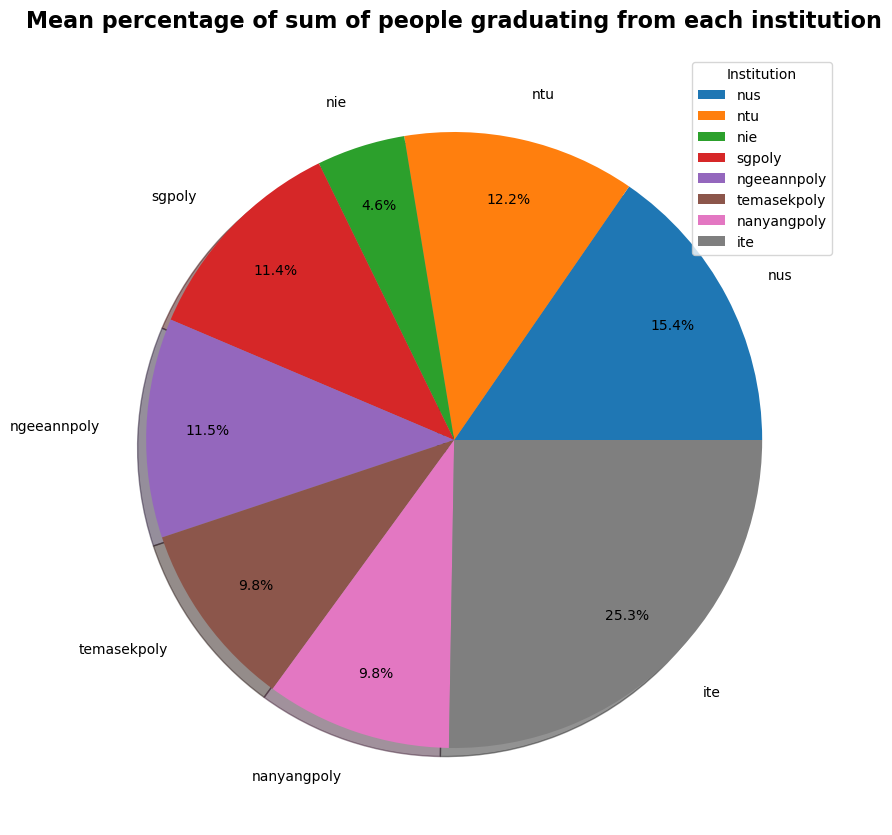

In [20]:
# Construct a pie chart

# Add the labels and sizes
labels = inst_pie.index
sizes =  inst_pie

# Make design more appealing
wedgeprops = {'linewidth': 0.4, 'edgecolor': 'black'}

# Title of the pie chart
# Add the figure


fig, ax1 = plt.subplots(figsize = (10, 10))

plt.title('Mean percentage of sum of people graduating from each institution', pad = 20, fontdict = {'fontsize': 16, 'fontweight': 'bold'})

ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 0,
       pctdistance = 0.8, labeldistance = 1.15)

# Add Legend
plt.legend(title = "Institution")

plt.show()

ITE (Institute of Technological Education) have the highest percentage of mean sum of people graduating by 25.3% compare to other institution. This highlight its huge role in educating students for success. The second highest percentage of mean sum of people graduating by 15.4% is NUS (National University of Singapore). In contrary, NIE (National Institute of Education) have the lowest percentage of mean sum of people graduating by only 4.6%.

C:\Users\Ivan Tay\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


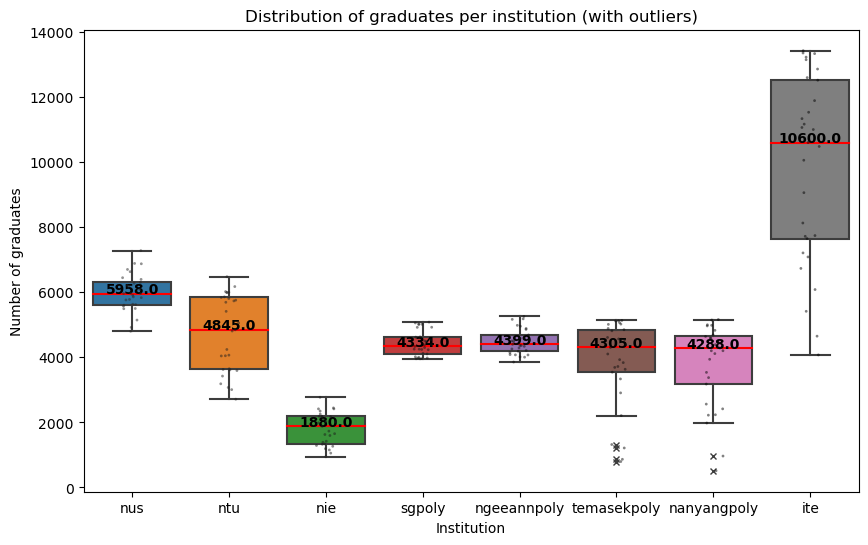

In [21]:
# Now make a box plot to find any outliers in sns.

# Make it into a function. Since it need to be call twice to check for outliers. This make sure code is reusable and efficient
# rather than making the same code twice

def institutebox(maintitle):
    plt.figure(figsize=(10, 6)) 

    # Create a box plot
    inst_boxplot = sns.boxplot(
        data=inst_box,
        flierprops={"marker": "x"},
        medianprops={"color": "r"},
    )


    # Get medians.
    # Source: 
    # https://sharkcoder.com/data-visualization/seaborn-boxplot#:~:text=To%20show%20median%20values%20on,5%20%3D%20upper%20extreme%20value).
    lines = inst_boxplot.get_lines()
    institution = inst_boxplot.get_xticks()

    for inst in institution:
        value = round(lines[4+inst*6].get_ydata()[0],1) 
        inst_boxplot.text(
            inst, 
            value, 
            f'{value}', 
            ha='center', 
            fontweight='bold', 
        )



    # Show the distribution of individual data
    sns.stripplot(data=inst_box, color="black", alpha=0.5, size=2)

    plt.title(maintitle)
    plt.xlabel("Institution")
    plt.ylabel("Number of graduates")

    plt.show()

institutebox('Distribution of graduates per institution (with outliers)')

There is outliers for temasek polytechnic and nanyang polytechnic. Now we want to remove the outliers for a more consistent dataset which can be use to find the correlation with unemployment and job vancancies later.

Not only that, ITE have the highest variaibility which shows its lack of consistency or fixed pattern when it comes to number of graduates in Singapore in that institute over the years. However, sgpoly (Singapore Polytechnic) have the lowest variaibility based on its box plot showing that it is more consistent or have a more fixed pattern when it comes to number of graduates in Singapore in that institution over the years.


In [22]:
# Remove outliers

# Make it into a list for column
column_name = list(inst_box)

# Before removing outliers
print('Columns and rows of inst_box before removing outliers:', inst_box.shape)

# If data is less than Quartile 1 or more than Quartile 3. It would be removed.
for i in column_name:
    # Calculating IQR
    Q1 = inst_box[i].quantile(0.25)
    Q3 = inst_box[i].quantile(0.75)
    IQR = Q3 - Q1
    inst_box = inst_box[(inst_box[i] >= Q1 - 1.5 * IQR) & (inst_box[i] <= Q3 + 1.5 * IQR)]


# After removing outliers
print('Columns and rows of inst_box after removing outliers:', inst_box.shape)



Columns and rows of inst_box before removing outliers: (29, 8)
Columns and rows of inst_box after removing outliers: (22, 8)


C:\Users\Ivan Tay\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


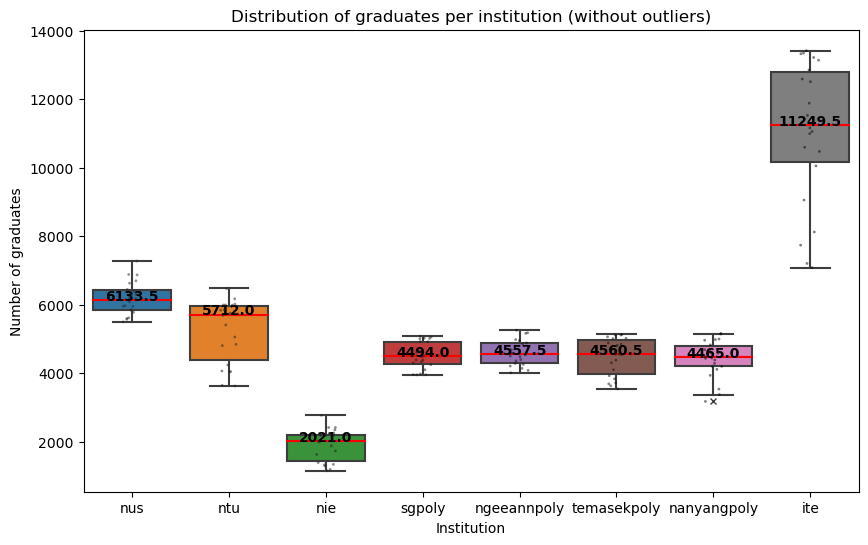

In [23]:
# Call the same function again to show the remove outliers

institutebox('Distribution of graduates per institution (without outliers)')

As you can see, the outliers are removed for temasek polytechnic and nanyang polytechnic. Since outliers are removed, new IQR is formed for nanyangpoly and one outlier was presented. Since it is relatively closed to the box plot, the outlier could be ignore.

# 3) Employment rate datasets

We will examine the employment rate for resident people in Singapore between age 24 to 60. Dataset is chosen because most people who graduated from an institution and finding a job will usually be above the age of 24.

In [24]:
# Get the employment rate for resident people in Singapore between age 24 to 60
emp

,year,emp_rate
0,1991,70.9
1,1992,70.9
2,1993,70.9
3,1994,71.6
4,1996,72.8
5,1997,73.0
6,1998,72.8
7,1999,72.1
8,2001,73.7
9,2002,72.1


In [25]:
# Data analysis for employment rate

datasets('Employment rate', emp)

Employment rate datasets have 29 rows and 2 columns

Employment rate datasets columns contain:

	- year
		- Datatype of year is: int64  
		- Number of null values counts: 0
		- year has 29 unique values

	- emp_rate
		- Datatype of emp_rate is: float64  
		- Number of null values counts: 0
		- emp_rate has 23 unique values
		- emp_rate sum from all years: 2209.70 
		- emp_rate minimum value from all years: 70.90 
		- emp_rate maximum value from all years: 82.70
		- emp_rate mean from all years: 76.20 
		- emp_rate median from all years: 76.50


Employment rate have two columns consist of year and emp_rate which means the employment rate

In here, we can see that both columns have zero null values.

emp_rate have a sum of 2209.70%. The least emp_rate over the years is 70.9%. The most emp_rate over the years is 82.7%. emp_rate have a lower mean than its median since it has a mean rate of 76.2% and median rate of 72.5%

In [26]:
# Set index for employment rate to year
emp = emp.set_index('year')

# 4) Job Vacancies datasets

Now, we want to get the number of job vacancies and job vacancies rate which both data are going to use to check the correlation of the number of graduation later on.

In [27]:
# Get the job vacancy number for each year in Singapore datatsets
job_num

,year,job_vacancy
0,1998,18300
1,1999,20800
2,2000,27600
3,2001,15900
4,2002,15000
5,2003,12600
6,2004,16500
7,2005,19200
8,2006,31200
9,2007,38600


In [28]:
# Data analysis for number of job vacancy

datasets('Numbers of Job vacancy', job_num) 

Numbers of Job vacancy datasets have 25 rows and 2 columns

Numbers of Job vacancy datasets columns contain:

	- year
		- Datatype of year is: int64  
		- Number of null values counts: 0
		- year has 25 unique values

	- job_vacancy
		- Datatype of job_vacancy is: int64  
		- Number of null values counts: 0
		- job_vacancy has 25 unique values
		- job_vacancy sum from all years: 1074600.00 
		- job_vacancy minimum value from all years: 12600.00 
		- job_vacancy maximum value from all years: 115000.00
		- job_vacancy mean from all years: 42984.00 
		- job_vacancy median from all years: 44200.00


Job vacancy have two columns consist of year and job_vacancy

In here, we can see that both columns have zero null values.

job_vacancy have a sum of 1074600. The least job_vacancy over the years is 12600. The most job_vacancy over the years is 115000.00. job_vacancy have a lower mean than its median since it has a mean of 42984.00 and median of 44200.00.

In [29]:
# Set the index for year
job_num = job_num.set_index('year')

In [30]:
# Get the job vacancy rate for each quarter in Singapore datatsets

job_rate

,quarter,job_vacancy_rate
0,1998-Q1,2.7
1,1998-Q2,2.0
2,1998-Q3,1.5
3,1998-Q4,1.3
4,1999-Q1,1.8
...,...,...
98,2022-Q3,4.8
99,2022-Q4,4.5
100,2023-Q1,4.3
101,2023-Q2,3.9


In [31]:
# Data analysis for job vacancy rate

datasets('Job vacancy rate', job_rate)

Job vacancy rate datasets have 103 rows and 2 columns

Job vacancy rate datasets columns contain:

	- quarter
		- Datatype of quarter is: object  
		- Number of null values counts: 0
		- quarter has 103 unique values

	- job_vacancy_rate
		- Datatype of job_vacancy_rate is: float64  
		- Number of null values counts: 0
		- job_vacancy_rate has 31 unique values
		- job_vacancy_rate sum from all quarters: 259.10 
		- job_vacancy_rate minimum value from all quarters: 1.20 
		- job_vacancy_rate maximum value from all quarters: 5.60
		- job_vacancy_rate mean from all quarters: 2.52 
		- job_vacancy_rate median from all quarters: 2.50


job_vacancy_rate have two columns consist of year and job_vacancy_rate

In here, we can see that both columns have zero null values.

job_vacancy_rate have a sum of 259.10% over the quarters. The least emp_rate over the quarters is 1.2%. The most job_vacancy_rate over the quarters is 5.60%. job_vacancy_rate have a higher mean than its median since it has a mean rate of 2.52% and median rate of 2.50%

In [32]:
# Create a new column 'year' by only getting the first 4 string (1998-Q1 --> 1998)
job_rate['year'] = job_rate['quarter'].str[:4]

# Make sure is numeric and not an object
job_rate['year'] = pd.to_numeric(job_rate['year'])

# Get the mean for job vacancy rate for each year
job_rate = job_rate.groupby('year')['job_vacancy_rate'].mean().reset_index()

# Use for concat later
job_rate = job_rate[4:25].set_index('year')

job_rate

,job_vacancy_rate
year,
2002,1.450
2003,1.250
2004,1.550
2005,1.700
2006,2.300
2007,2.625
2008,2.350
2009,1.825
2010,2.550


# Line graph to see the trend for Employment rate, job vacancies and job rate

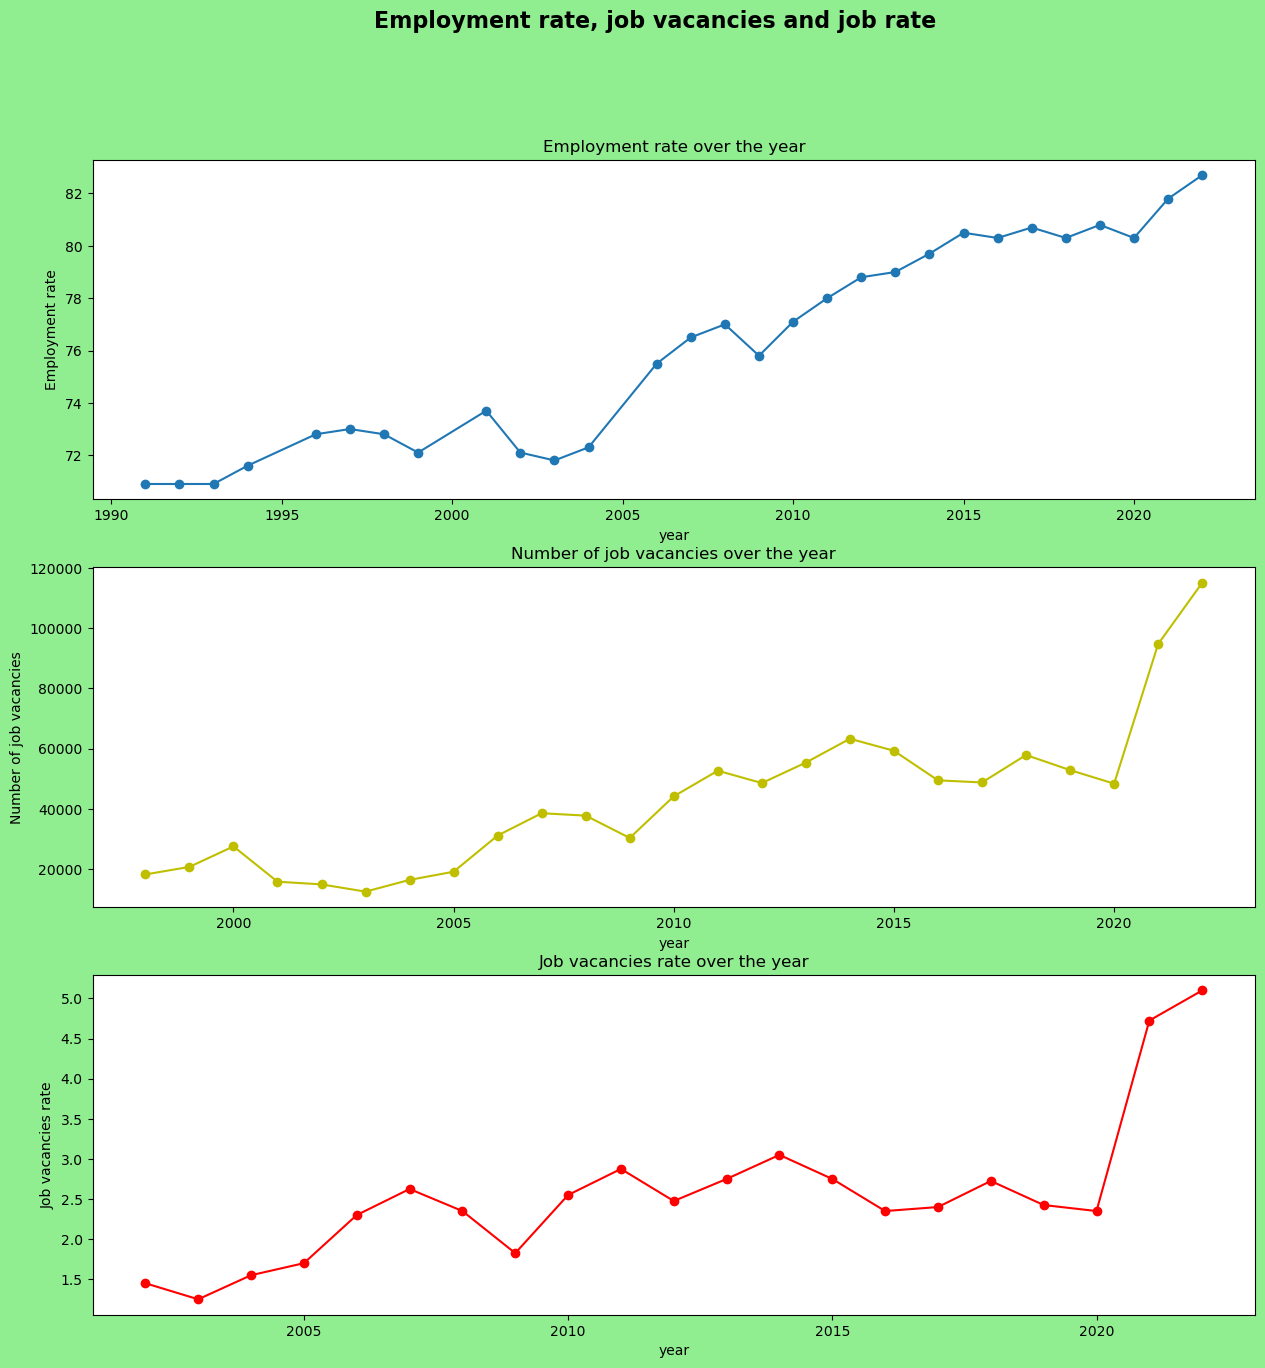

In [33]:
# Get all 3 datasets to produce the line graph

# Use np.array
emp_np = np.array(emp)
job_num_np = np.array(job_num)
job_rate_np = np.array(job_rate)

# Plotting

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15, 15))
fig.set_facecolor('lightgreen')
fig.suptitle('Employment rate, job vacancies and job rate', fontsize = 16, fontweight = 'bold')

# Employment rate over the year
ax1.plot(emp.index, emp_np, label = 'Employment rate', marker = 'o')
ax1.set_title('Employment rate over the year')
ax1.set_xlabel('year')
ax1.set_ylabel('Employment rate')

# Number of job vacancies over the year
ax2.plot(job_num.index, job_num_np, label = 'Number of job vacancies', marker = 'o', color = 'y')
ax2.set_title('Number of job vacancies over the year')
ax2.set_xlabel('year')
ax2.set_ylabel('Number of job vacancies')

# Job vacancies rate over the year
ax3.plot(job_rate.index, job_rate_np, label = 'Job vacancies rate', marker = 'o', color = 'r')
ax3.set_title('Job vacancies rate over the year')
ax3.set_xlabel('year')
ax3.set_ylabel('Job vacancies rate')

ax3.set_xticks([2005, 2010, 2015, 2020])


plt.show()

Employment rate, number of job vacancies and job vacancies rate over the years have been increasing over the years. This could be related to a higher rise in education allowing more residents to have more job opprtunities. Especially with a huge spike of number of job vacancies and job vacancies rate from 2020 to 2021, this might be due to other external factors such as Covid-19 recovery where more business starts to seek for more workers and business growth, increasing the rise of job vacancy.

# 5) Linear Regression

We want to find the sum of all institute graduation over the years and compare it with employment rate and number of job vacancies and job vancancies rate. Then, we want to combine all 4 columns into a dataset to use linear regression to check for data relationship.

In [34]:
# Find sum of institute graduate
inst_box['sum_grad'] = inst_box.sum(axis = 1)

# Find sum of graduation
print('Sum of graduation\n')
print(f'{inst_box.head()}\n')


# Put employment rate and sum of graduation into a new dataset by concatenating
grad_empjob = pd.concat([emp, job_num, job_rate,  inst_box['sum_grad']], axis=1)


# Drop NA value because between 1991 and 2001 there is no sum of graduation value
grad_empjob = grad_empjob.dropna()

grad_empjob

Sum of graduation

       nus   ntu   nie  sgpoly  ngeeannpoly  temasekpoly  nanyangpoly   ite  \
year                                                                          
2001  5958  3628  2022    3958         4257       3543.0       3178.0  7208   
2002  6277  3646  2186    3955         4399       3690.0       3537.0  7084   
2003  5960  4042  2772    3981         4210       3837.0       3376.0  7741   
2004  5858  4067  1989    4504         4289       4102.0       3939.0  8127   
2005  5575  4048  2020    4537         4143       3633.0       4202.0  9059   

      sum_grad  
year            
2001   33752.0  
2002   34774.0  
2003   35919.0  
2004   36875.0  
2005   37217.0  



,emp_rate,job_vacancy,job_vacancy_rate,sum_grad
year,,,,
2002,72.1,15000.0,1.450,34774.0
2003,71.8,12600.0,1.250,35919.0
2004,72.3,16500.0,1.550,36875.0
2006,75.5,31200.0,2.300,38033.0
2007,76.5,38600.0,2.625,39657.0
2008,77.0,37800.0,2.350,40963.0
2009,75.8,30400.0,1.825,42133.0
2010,77.1,44200.0,2.550,43487.0
2011,78.0,52700.0,2.875,45028.0


Pre-process the data by removing outliers.

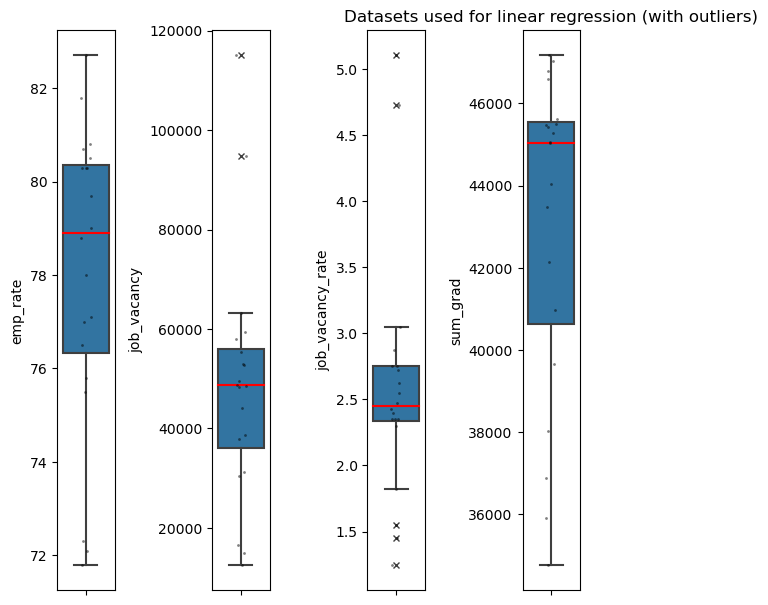

In [35]:
def grad_empjob_box(title):

    fig1, axMany = plt.subplots(1, 4, figsize=(6, 6))
    

    
    colCnt = 0;
    for item in grad_empjob.columns:
        # Create a box plot
        sns.boxplot(
            y=grad_empjob[item],
            flierprops={"marker": "x"},
            medianprops={"color": "r"},
            ax = axMany[colCnt]
        )

        # Show the distribution of individual data
        sns.stripplot(y=grad_empjob[item], color="black", alpha=0.5, size=2, ax = axMany[colCnt])
        colCnt = colCnt + 1
    
    plt.tight_layout()

    plt.title(title)
    plt.show()

grad_empjob_box('Datasets used for linear regression (with outliers)')


We can see that there is outliers for job_vacancy and job_vacancy_rate. We need to remove outliers to ensure the model to have a better fit and give a better results.

In [36]:
# Remove outliers

# Calculating IQR

# Make it into a list for column
column_name = list(grad_empjob)


# Before removing outliers
print('Columns and rows of grad_empjob_box before removing outliers:', grad_empjob.shape)

# If data is less than Quartile 1 or more than Quartile 3. It would be removed.
for i in column_name:
    Q1 = grad_empjob[i].quantile(0.25)
    Q3 = grad_empjob[i].quantile(0.75)
    IQR = Q3 - Q1
    grad_empjob = grad_empjob[(grad_empjob[i] >= Q1 - 1.5 * IQR) & (grad_empjob[i] <= Q3 + 1.5 * IQR)]
    

# After removing outliers
print('Columns and rows of grad_empjob_box after removing outliers:', grad_empjob.shape)



Columns and rows of grad_empjob_box before removing outliers: (20, 4)
Columns and rows of grad_empjob_box after removing outliers: (15, 4)


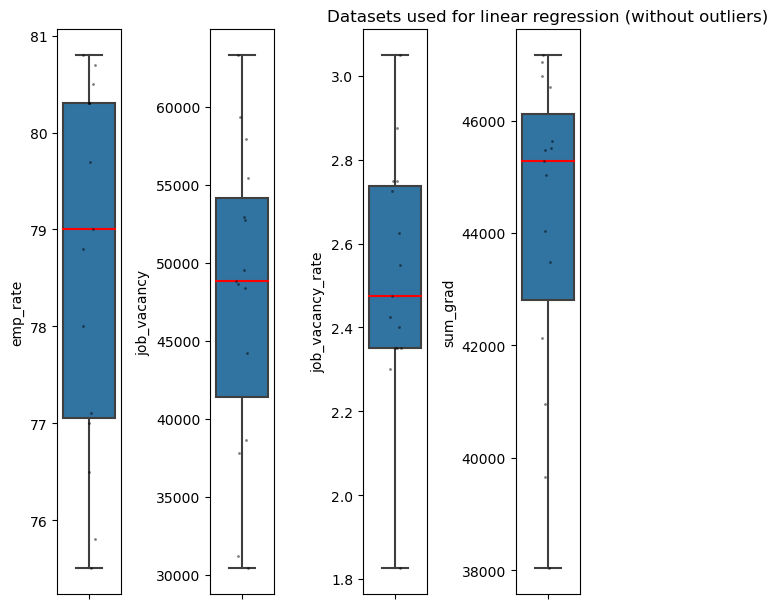

In [37]:
# See graph after removing outliers

grad_empjob_box('Datasets used for linear regression (without outliers)')


job_vacancy and job_vacancy_rate outliers have been removed

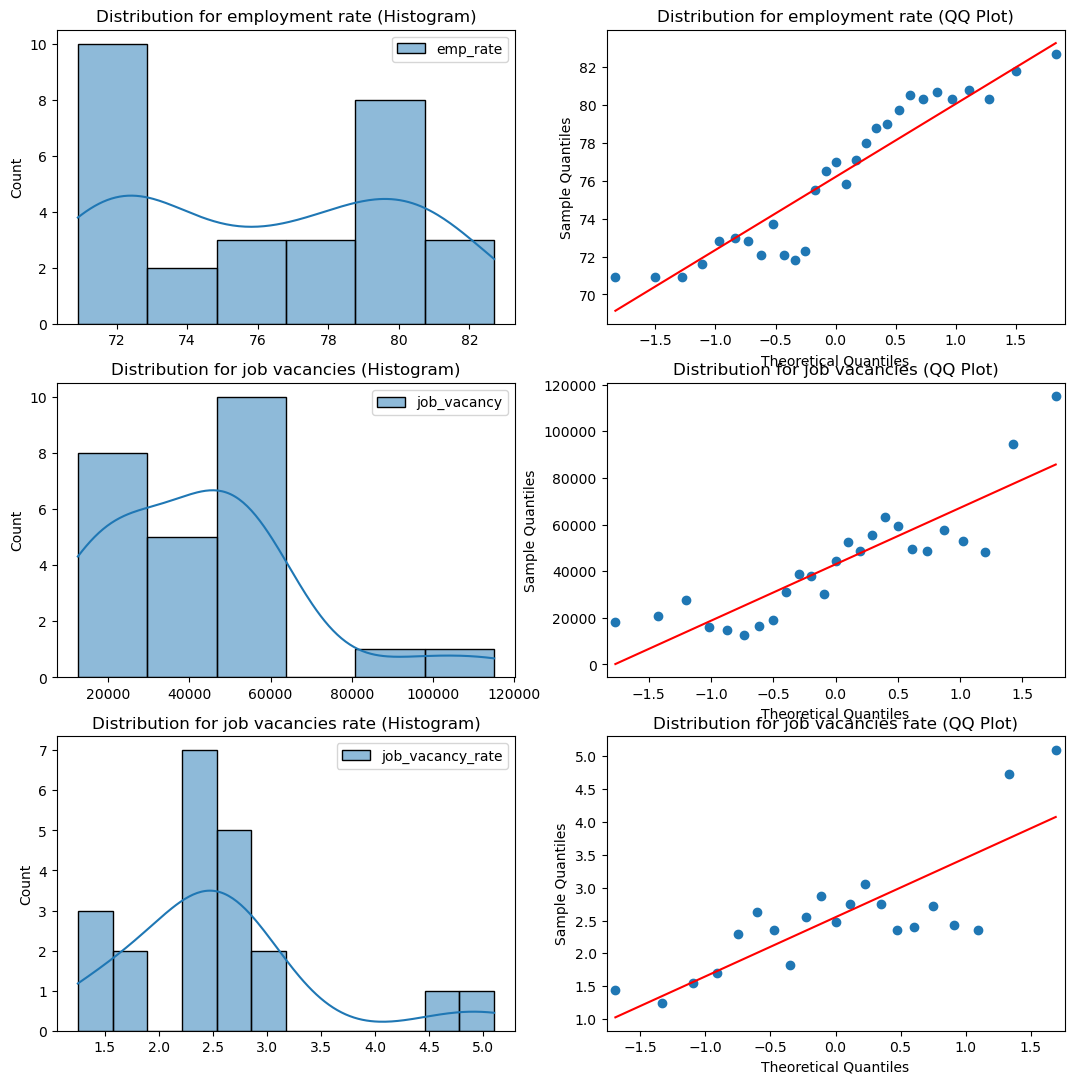

In [38]:
# Check the datasets distribution

fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(13, 13))

# Distribution for employment rate
sns.histplot(emp, kde=True, ax=ax1)
sm.qqplot(emp, line='s', ax=ax2)
ax1.set_title('Distribution for employment rate (Histogram)')
ax2.set_title('Distribution for employment rate (QQ Plot)')

# Distribution for job vacancies
sns.histplot(job_num, kde=True, ax=ax3)
sm.qqplot(job_num, line='s', ax=ax4)
ax3.set_title('Distribution for job vacancies (Histogram)')
ax4.set_title('Distribution for job vacancies (QQ Plot)')

# Distribution for job vacancies rate
sns.histplot(job_rate, kde=True, ax=ax5)
sm.qqplot(job_rate, line='s', ax=ax6)
ax5.set_title('Distribution for job vacancies rate (Histogram)')
ax6.set_title('Distribution for job vacancies rate (QQ Plot)')


plt.show()

From here, we can see that employment rate have a slightly normal distribution based on the qqplot and histogram. This might allow data to be abit more reliable but not as reliable or accurate as a normal distribution histogram and qqplot. However, job vacancies and job vacancies rate does not really have a normal distribution based on both the qqplot and histogram. This might cause data to be a little less reliable but should not be a major factor.

# 6)  See whether there is a correlation between sum of graduation and employment rate, job vacancy, job vacancy rate using Linear Regression through statsmodels.

In [39]:
# Use linear regression to see whether there is any correlation.

# Check correlation for employment rate with sum of graduation
print('Correlation for employment rate and sum of graduation\n')
gradEmpModel = smf.ols(formula='emp_rate ~ sum_grad', data=grad_empjob).fit()

# Show gradEmpModel summary
print(gradEmpModel.summary())


# Check correlation for job vacancy with sum of graduation
print('\n\nCorrelation for number of job vacancy and sum of graduation\n')
gradJobModel = smf.ols(formula='job_vacancy ~ sum_grad', data=grad_empjob).fit()

# Show gradJobModel summary
print(gradJobModel.summary())

# Check correlation for job vacancy rate with sum of graduation
print('\n\nCorrelation for job vacancy rate and sum of graduation\n')
grabJobRateModel = smf.ols(formula='job_vacancy_rate ~ sum_grad', data=grad_empjob).fit()

# Show grabJobRateModel summary
print(grabJobRateModel.summary())

Correlation for employment rate and sum of graduation

                            OLS Regression Results                            
Dep. Variable:               emp_rate   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     29.72
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           0.000111
Time:                        17:08:15   Log-Likelihood:                -21.370
No. Observations:                  15   AIC:                             46.74
Df Residuals:                      13   BIC:                             48.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

C:\Users\Ivan Tay\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Ivan Tay\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Ivan Tay\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Correlation for employment rate and sum of graduation have a high R-squared of 0.696. Correlation for number of job vacancy and sum of graduation have a high R-squared of 0.648. 

This shows that sum of graduation does have a high correlation with employment rate and number of job vacancy, indicating that when there is a higher sum of graduation, the likelihood of employment rate and number of job vacancy will increase as well maybe because there will be an increase in labour force.

However, Correlation for job vacancy rate and sum of graduation have a low R-squared of 0.139. It means there is barely any correlation for sum of graduation and job vacancy rate, this can indicate that when there is a rise of graduation from other institution does not mean that job positions availability relative to the total job market or workforce will increase as well mainly because of other competitors.

In [40]:
# Check correlation for employment rate with sum of graduation and job vacancy
print('Correlation for employment rate with sum of graduation and job vacancy\n')

gradEmpJobModel = smf.ols(formula='emp_rate  ~ sum_grad +  job_vacancy', data=grad_empjob).fit()

# Show gradEmpJobModel summary
print(gradEmpJobModel.summary())


Correlation for employment rate with sum of graduation and job vacancy

                            OLS Regression Results                            
Dep. Variable:               emp_rate   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     19.01
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           0.000190
Time:                        17:08:16   Log-Likelihood:                -19.585
No. Observations:                  15   AIC:                             45.17
Df Residuals:                      12   BIC:                             47.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

C:\Users\Ivan Tay\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Correlation for employment rate with sum of graduation and job vacancy has a extremely high R-squared value of 0.760. This shows that when there is an increase in graduates and job vacancy, there will be likely increase in employment rate too. It can be related to how a higher labour force with a higher job position availability create more employment opportunity.

# 7) How well the model fit the data?

We have created our model and want to see how well it does when it fit the data?

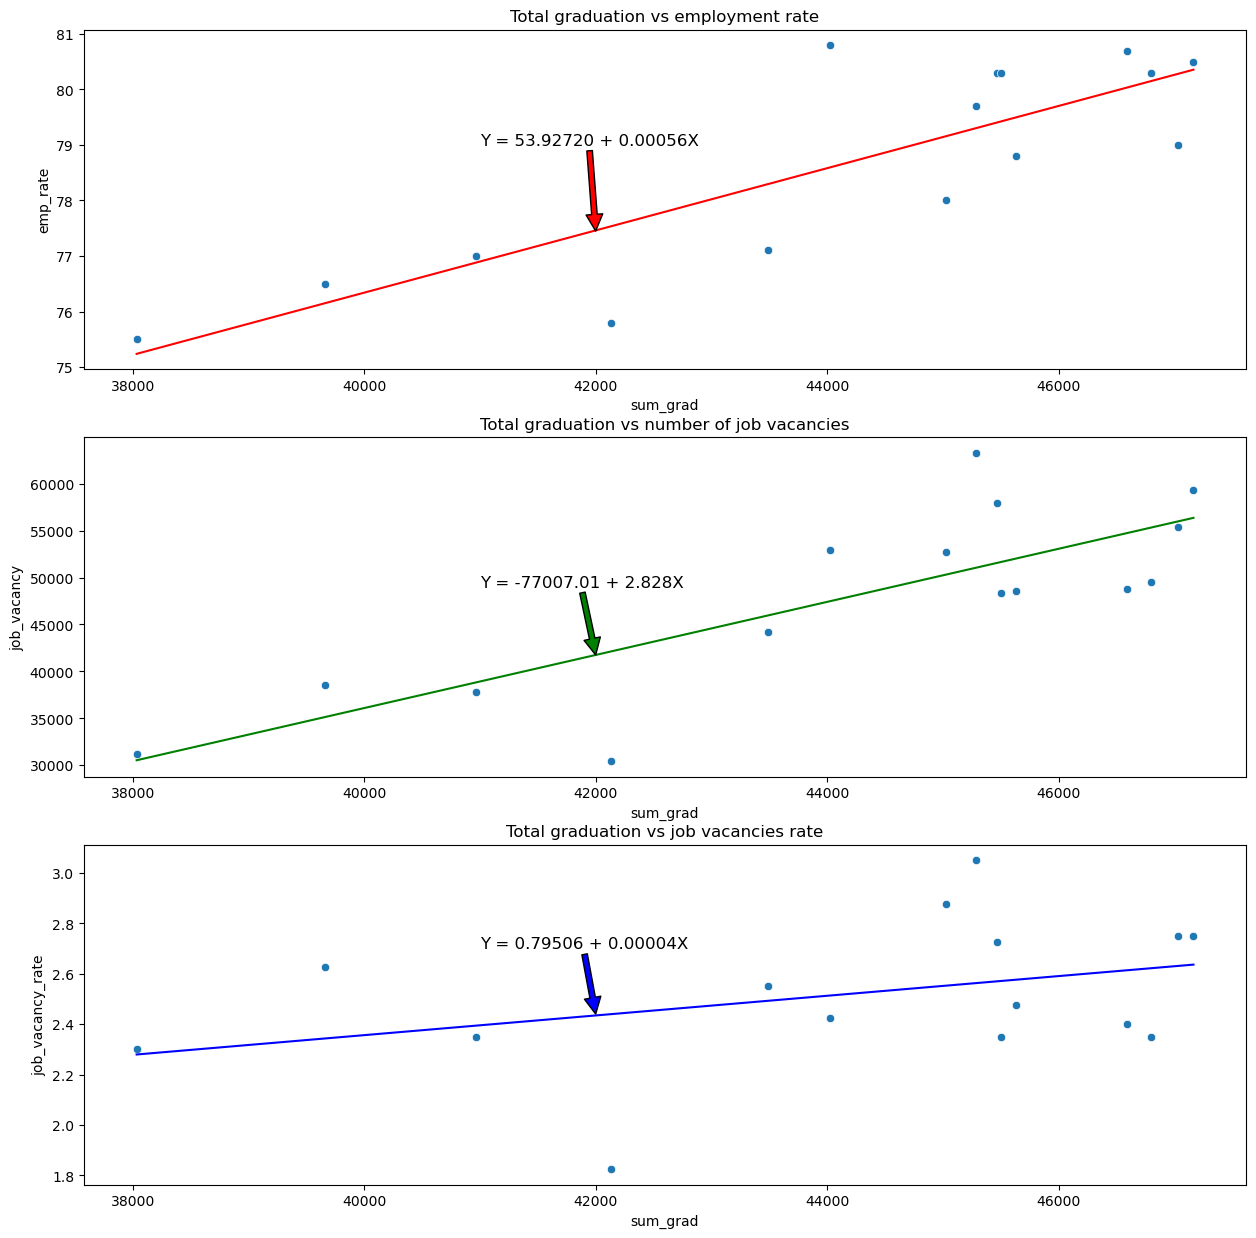

In [41]:
# How well the linear regression fit the data?
# Use Scatter Plot

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15, 15))

# See how well the linear regression fit for total graduation and employment rate 
ax1.set_title("Total graduation vs employment rate")

sns.scatterplot(y = grad_empjob['emp_rate'], x = grad_empjob['sum_grad'], ax = ax1)
sns.lineplot(x= grad_empjob['sum_grad'] , y=gradEmpModel.predict(grad_empjob['sum_grad']), ax = ax1, color = 'red')

# Show the linear model line 1
linearModEq1 = f'Y = {gradEmpModel.params[0]:.5f} + {gradEmpModel.params[1]:.5f}X'
ax1.annotate(linearModEq1, xy=(42000, 77.45), xytext=(41000, 79), size=12, arrowprops=dict(facecolor='red'))

# See how well the linear regression fit for total graduation and job vancancies 
ax2.set_title("Total graduation vs number of job vacancies")
sns.scatterplot(y = grad_empjob['job_vacancy'], x = grad_empjob['sum_grad'], ax = ax2)
sns.lineplot(x= grad_empjob['sum_grad'] , y=gradJobModel.predict(grad_empjob['sum_grad']), ax = ax2, color = 'green')

# Show the linear model line 2
linearModEq2 = f'Y = {gradJobModel.params[0]:.2f} + {gradJobModel.params[1]:.3f}X'
ax2.annotate(linearModEq2, xy=(42000, 41750), xytext=(41000, 49000), size=12, arrowprops=dict(facecolor='green'))

# See how well the linear regression fit for total graduation and job vacancies rate 
ax3.set_title("Total graduation vs job vacancies rate")
sns.scatterplot(y = grad_empjob['job_vacancy_rate'], x = grad_empjob['sum_grad'], ax = ax3)
sns.lineplot(x= grad_empjob['sum_grad'] , y=grabJobRateModel.predict(grad_empjob['sum_grad']), ax = ax3, color = 'blue')

# Show the linear model line 3
linearModEq3 = f'Y = {grabJobRateModel.params[0]:.5f} + {grabJobRateModel.params[1]:.5f}X'
ax3.annotate(linearModEq3, xy=(42000, 2.44), xytext=(41000, 2.7), size=12, arrowprops=dict(facecolor='blue'))

plt.show()



Linear regression line does fit quite well in the scatter plot for all 3 graphs. The scatter plot are quite close to the line for all 3 graphs and the linear regression line does capture the overall trend for all 3 graphs where total graduation vs employment rate and total graduation vs job vacancies have a high positive correlation while total graduation vs job vacancies have a very low positive correlation.